# Bank Marketing Campaign Analysis

Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


Importing Marketing Database Records

In [2]:
bank_dataset = pd.read_csv("bank-full.csv",sep=";")
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Now let's have a look on the dataset

In [3]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_dataset.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [6]:
bank_dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Displaying unique values of each column

In [7]:
cols=('age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y')
for cols in bank_dataset:
    print(cols)
    print(bank_dataset[cols].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance
[ 2143    29     2 ...  8205 14204 16353]
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

Now summarizing deposit according to the Job profile.

In [8]:
bank_dataset.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
bank_dataset.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
bank_dataset['deposit']= bank_dataset['y'].apply(lambda x:0 if x=='no' else 1)
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [11]:
pt_deposit = pd.pivot_table(bank_dataset, values='deposit',index='job',columns='y',aggfunc=len)
pt_deposit

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In order to get a better understanding of our data, we decided to explore it visually

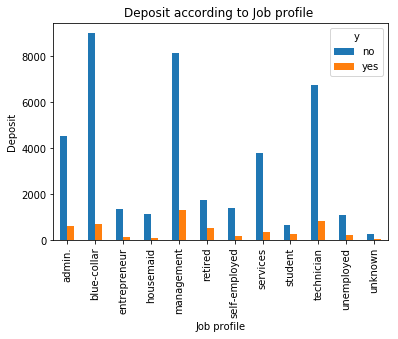

In [12]:
pt_deposit.plot(kind='bar')
plt.xlabel('Job profile')
plt.ylabel('Deposit')
plt.title('Deposit according to Job profile ')
plt.show()

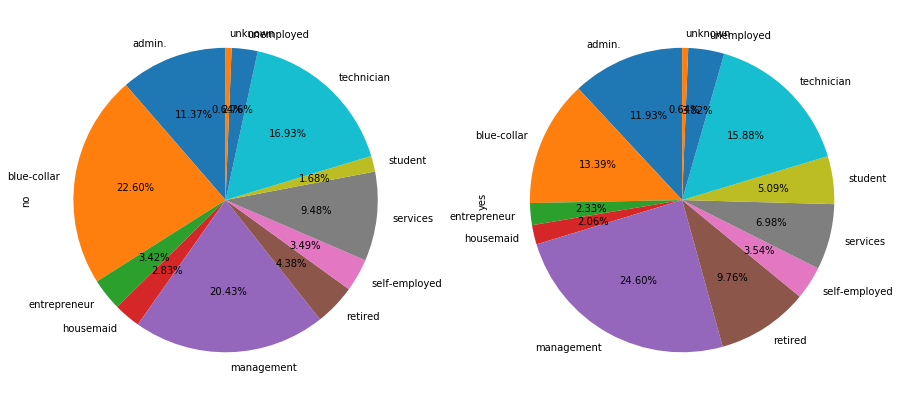

In [13]:
pt_deposit.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.2f%%' % x,
    legend=False
)

plt.show()

In [14]:
bank_dataset.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Visiualizing outcome of the previous marketing campaign

Text(0.5,1,'Number of poutcome')

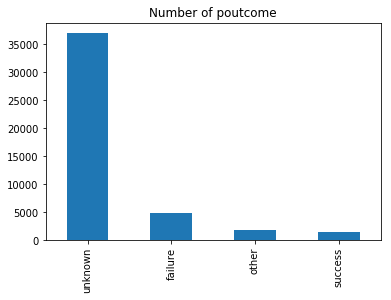

In [15]:
bank_dataset['poutcome'].value_counts().plot(kind='bar')
plt.title('Number of poutcome')

Number of client subscribed a term deposit

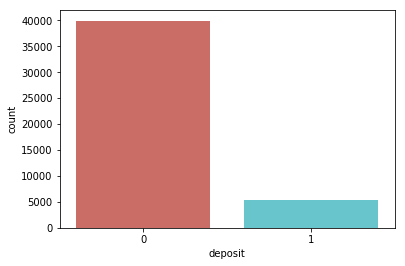

In [16]:
sns.countplot(x='deposit',data=bank_dataset, palette='hls')
plt.show()

### Data Pre-processing 

In [17]:
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [18]:
print(bank_dataset.month.nunique())
print(bank_dataset.month.unique())

12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [19]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

bank_dataset['month'] = bank_dataset['month'].apply(lambda x: months.index(x)+1)
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0


In [20]:
del bank_dataset['y']

In [21]:
bank_dataset['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [22]:
bank_dataset['pcontact']= bank_dataset['pdays'].apply(lambda x:0 if x==-1 else 1)
del bank_dataset['pdays']
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit,pcontact
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,0,unknown,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,0,unknown,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,0,unknown,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,0,unknown,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,0,unknown,0,0


In [23]:
bank_dataset.pcontact.value_counts()

0    36954
1     8257
Name: pcontact, dtype: int64

### Preparing our Dataset for ML

In [24]:
cat_cols=bank_dataset.select_dtypes(include=['object']).columns

In [25]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [26]:
num_cols = [x for x in bank_dataset.columns if x not in cat_cols]
del num_cols[-1]
del num_cols[-1]
num_cols 

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'previous']

In [27]:
bin_cols = bank_dataset.nunique()[bank_dataset.nunique() == 2].keys().tolist()
del bin_cols[3]
bin_cols

['default', 'housing', 'loan', 'pcontact']

In [28]:
for i in bin_cols :
    bank_dataset[i] = LabelEncoder().fit_transform(bank_dataset[i])
bank_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit,pcontact
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0,unknown,0,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,0,unknown,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,0,unknown,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,0,unknown,0,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,0,unknown,0,0


In [29]:
multi_cols = [i for i in cat_cols if i not in bin_cols]
multi_cols

['job', 'marital', 'education', 'contact', 'poutcome']

In [30]:
bank_dataset = pd.get_dummies(data = bank_dataset, columns = multi_cols )
bank_dataset.head()

,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,0,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,1,0,0,1,0,0,0,1


In [31]:
scaled_cols=StandardScaler().fit_transform(bank_dataset[num_cols])
scaled_cols=pd.DataFrame(scaled_cols,columns=num_cols)

In [32]:
bank_dataset=bank_dataset.drop(columns=num_cols,axis=1)
bank_dataset=bank_dataset.merge(scaled_cols,left_index=True,right_index=True,how="left")
bank_dataset.head()

,default,housing,loan,deposit,pcontact,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,month,duration,campaign,previous
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,1.606965,0.256419,-1.298476,-0.475354,0.011016,-0.569351,-0.25194
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.288529,-0.437895,-1.298476,-0.475354,-0.416127,-0.569351,-0.25194
2,0,1,1,0,0,0,0,1,0,0,...,0,0,1,-0.747384,-0.446762,-1.298476,-0.475354,-0.707361,-0.569351,-0.25194
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0.571051,0.047205,-1.298476,-0.475354,-0.645231,-0.569351,-0.25194
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.747384,-0.447091,-1.298476,-0.475354,-0.233620,-0.569351,-0.25194


### Splitting dataset

In [33]:
X= bank_dataset.drop(['deposit'],axis=1).values
y=bank_dataset['deposit'].values

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [35]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (31647, 37)
Number transactions y_train dataset:  (31647,)
Number transactions X_test dataset:  (13564, 37)
Number transactions y_test dataset:  (13564,)


In [36]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (55742, 37)
After OverSampling, the shape of train_y: (55742,) 

After OverSampling, counts of label '1': 27871
After OverSampling, counts of label '0': 27871


# Model 1 :- Logistic Regression 

In [37]:
model_lr = LogisticRegression(solver='lbfgs',random_state=0)
model_lr.fit(X_train,y_train)

y_train_pred_lr= model_lr.predict(X_train)
y_test_pred_lr=model_lr.predict(X_test)

acc_lr="{0:.2f}%".format(100*accuracy_score(y_test_pred_lr, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_lr,y_test)))
print(confusion_matrix(y_test, y_test_pred_lr))
print(classification_report(y_test, y_test_pred_lr))

Accuracy 90.57%
[[11758   293]
 [  986   527]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12051
           1       0.64      0.35      0.45      1513

    accuracy                           0.91     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.91      0.89     13564



In [38]:
y_pred_proba_lr = model_lr.predict_proba(X_test)
y_pred_proba_lr

array([[0.94796244, 0.05203756],
       [0.99154194, 0.00845806],
       [0.99222522, 0.00777478],
       ...,
       [0.99024895, 0.00975105],
       [0.81057536, 0.18942464],
       [0.97083178, 0.02916822]])

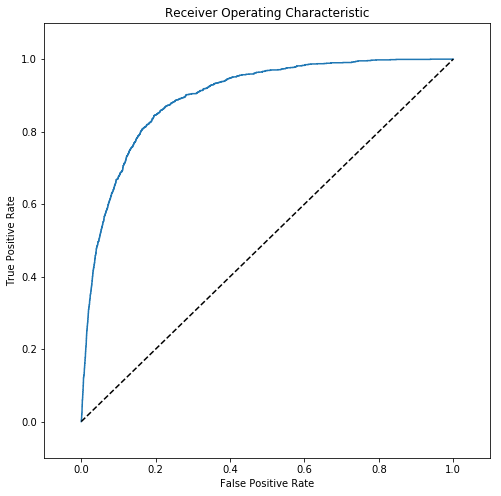

In [39]:
fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_proba_lr[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_lr, tpr_lr, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
#AUC for Train set
auc_train_lr=roc_auc_score(y_train, y_train_pred_lr)
print(auc_train_lr)
#AUC for Test set
auc_test_lr=auc(fpr_lr, tpr_lr)
print(auc_test_lr)

0.6501574112405885
0.8957423898420694


# Model 2 :- Random Forest 

In [41]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

acc_rf="{0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test)))
print(confusion_matrix(y_test, y_test_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

Accuracy 90.72%
[[11723   328]
 [  931   582]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12051
           1       0.64      0.38      0.48      1513

    accuracy                           0.91     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.91      0.90     13564



In [42]:
y_pred_proba_rf = model_rf.predict_proba(X_test)
y_pred_proba_rf

array([[0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.81, 0.19],
       [1.  , 0.  ]])

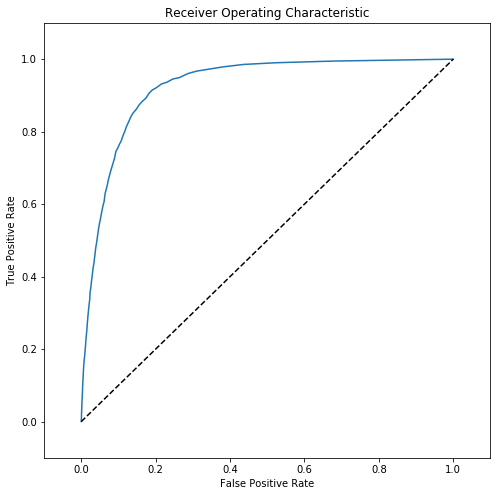

In [43]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_rf, tpr_rf, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
#AUC for Train set
auc_train_rf=roc_auc_score(y_train, y_train_pred_rf)
print(auc_train_rf)
#AUC for Test set
auc_test_rf=auc(fpr_rf, tpr_rf)
print(auc_test_rf)

0.9998675847457628
0.9242027836859683


# Model 3 :- Decision Tree 

In [45]:
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)

y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)
score = model_dt.score(X_test, y_test)

acc_dt="{0:.2f}%".format(100*accuracy_score(y_test_pred_dt, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_dt, y_test)))
print(confusion_matrix(y_test, y_test_pred_dt))
print(classification_report(y_test, y_test_pred_dt))

Accuracy 87.25%
[[11096   955]
 [  775   738]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12051
           1       0.44      0.49      0.46      1513

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.88      0.87      0.88     13564



In [46]:
y_pred_proba_dt = model_dt.predict_proba(X_test)
y_pred_proba_dt

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

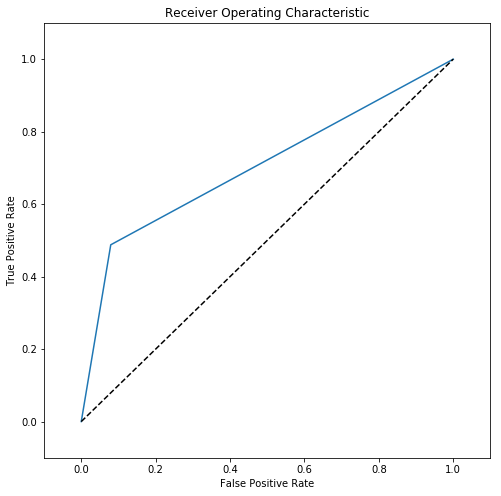

In [47]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_proba_dt[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_dt, tpr_dt, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
#AUC for Train set
auc_train_dt=roc_auc_score(y_train, y_train_pred_dt)
print(auc_train_dt)
#AUC for Test set
auc_test_dt=auc(fpr_dt, tpr_dt)
print(auc_test_dt)

1.0
0.7042630507937652


# Model 4 :- Knn Classifier 

In [49]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)
score = model_knn.score(X_test, y_test)

acc_knn="{0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test)))
print(confusion_matrix(y_test, y_test_pred_knn))
print(classification_report(y_test, y_test_pred_knn))

Accuracy 89.17%
[[11532   519]
 [  950   563]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12051
           1       0.52      0.37      0.43      1513

    accuracy                           0.89     13564
   macro avg       0.72      0.66      0.69     13564
weighted avg       0.88      0.89      0.88     13564



In [50]:
y_pred_proba_knn = model_dt.predict_proba(X_test)
y_pred_proba_knn

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

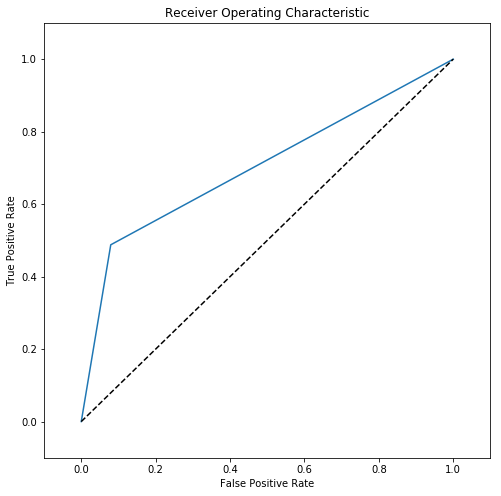

In [51]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_proba_knn[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_knn, tpr_knn, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
#AUC for Train set
auc_train_knn=roc_auc_score(y_train, y_train_pred_knn)
print(auc_train_knn)
#AUC for Test set
auc_test_knn=auc(fpr_knn, tpr_knn)
print(auc_test_knn)

0.7837088350140994
0.7042630507937652


# Model 5 :- SVC 

In [53]:
model_svc = SVC(kernel = 'rbf', random_state=0)
model_svc.fit(X_train, y_train)

y_train_pred_svc = model_svc.predict(X_train)
y_test_pred_svc = model_svc.predict(X_test)
score = model_svc.score(X_test, y_test)

acc_svc="{0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test)))
print(confusion_matrix(y_test, y_test_pred_svc))
print(classification_report(y_test, y_test_pred_svc))

Accuracy 90.50%
[[11787   264]
 [ 1025   488]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12051
           1       0.65      0.32      0.43      1513

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



In [54]:
y_pred_proba_svc = model_dt.predict_proba(X_test)
y_pred_proba_svc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

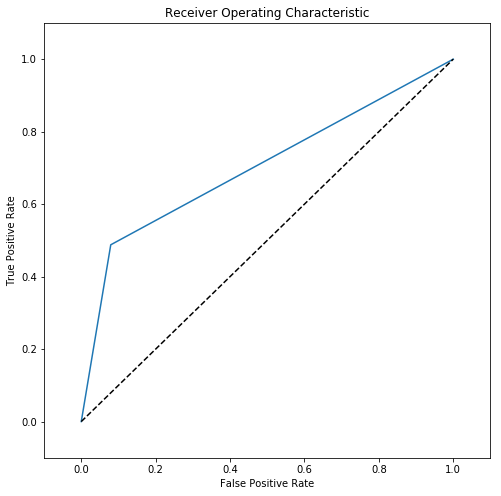

In [55]:
fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_pred_proba_svc[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr_svc, tpr_svc, label='l1')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
#AUC for Train set
auc_train_svc=roc_auc_score(y_train, y_train_pred_svc)
print(auc_train_svc)
#AUC for Test set
auc_test_svc=auc(fpr_svc, tpr_svc)
print(auc_test_svc)

0.6636765141186179
0.7042630507937652


# Model 6 :- XG Boost 

In [57]:
model_xgb = XGBClassifier(random_state=0)
model_xgb.fit(X_train, y_train)

y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)
score = model_xgb.score(X_test, y_test)

acc_xgb="{0:.2f}%".format(100*accuracy_score(y_test_pred_xgb, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_xgb, y_test)))
print(confusion_matrix(y_test, y_test_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

Accuracy 90.97%
[[11746   305]
 [  920   593]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12051
           1       0.66      0.39      0.49      1513

    accuracy                           0.91     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.90      0.91      0.90     13564



In [58]:
y_pred_proba_xgb = model_xgb.predict_proba(X_test)
y_pred_proba_xgb

array([[0.95534474, 0.04465527],
       [0.99515826, 0.00484177],
       [0.993982  , 0.00601801],
       ...,
       [0.9971098 , 0.00289021],
       [0.9412959 , 0.05870409],
       [0.98790675, 0.01209326]], dtype=float32)

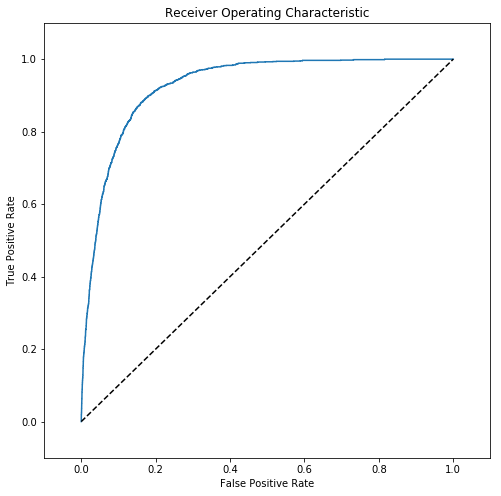

In [59]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_proba_xgb[:,1])

fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

plt.plot(fpr_xgb, tpr_xgb, label='l1')
plt.plot([0,1],[0,1], 'k--')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
#AUC for Train set
auc_train_xgb=roc_auc_score(y_train, y_train_pred_xgb)
print(auc_train_xgb)
#AUC for Test set
auc_test_xgb=auc(fpr_xgb, tpr_xgb)
print(auc_test_xgb)

0.6775084088983812
0.9277663178900993


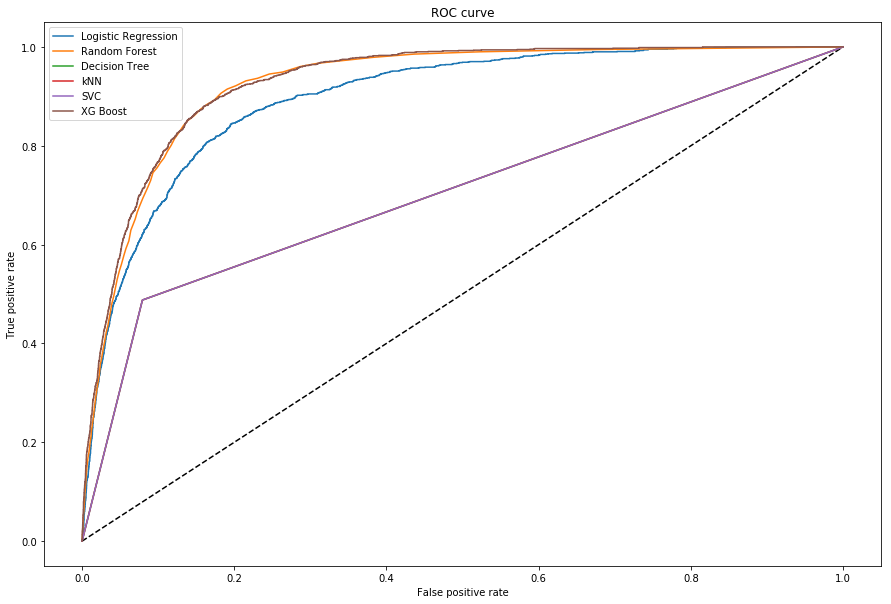

In [61]:
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='kNN')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.plot(fpr_xgb, tpr_xgb, label='XG Boost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

As we can see, the model with the best ROC curve is the Random forest Classifier & XG Boost.

Our observations from the AUC concur with the test data scores across all the models, as shown below.

In [62]:
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'KNN', 'SVC', 
              'XG Boost'],
    'Testing Score': [acc_lr , acc_rf, acc_dt, acc_knn, acc_svc, acc_xgb],
    'AUC': [auc_test_lr,auc_test_rf,auc_test_dt,auc_test_knn,auc_test_svc,auc_test_xgb]
})

summary = summary.sort_values(by=['Testing Score','AUC'], ascending=False).reset_index(drop=True).reindex(range(len(summary)))
summary=summary[['Model','Testing Score','AUC']]

summary

,Model,Testing Score,AUC
0,XG Boost,90.97%,0.927766
1,Random Forest Classifier,90.72%,0.924203
2,Logistic Regression,90.57%,0.895742
3,SVC,90.50%,0.704263
4,KNN,89.17%,0.704263
5,Decision Tree Classifier,87.25%,0.704263


Based on the model scores, XG Boost & Random Forest Classifier seems to be the best model for this dataset.